In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
img_dir = '/content/drive/My Drive/Colab Notebooks/Computer Vision/'

Contoured Apple:


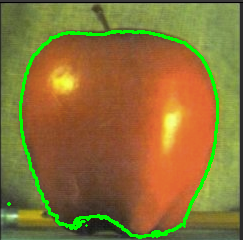

Whole Image:


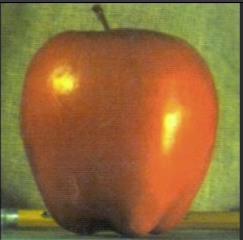

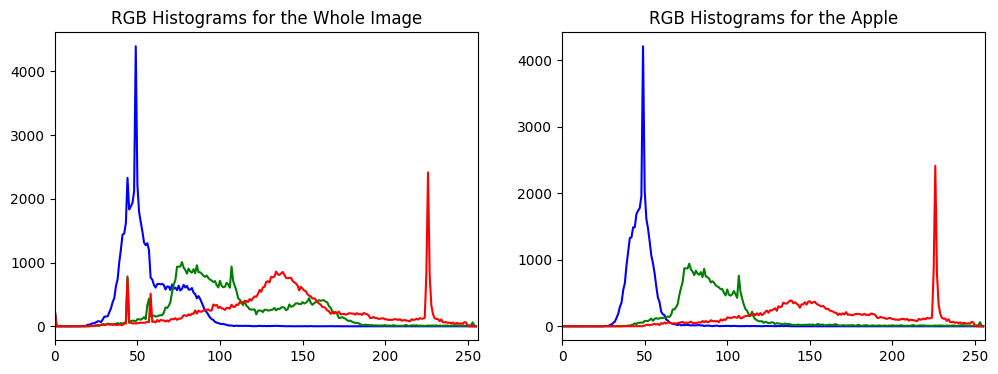

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in color mode
img = cv2.imread(img_dir + 'Apple.png', cv2.IMREAD_COLOR)

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper boundaries for the orange color 
lower_orange = np.array([5, 50, 50])
upper_orange = np.array([20, 255, 255])

# Create a mask for the orange color
mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)

# Apply the mask to the image to isolate the apple
masked_img = cv2.bitwise_and(img, img, mask=mask_orange)

# Find contours in the masked image
contours, hierarchy = cv2.findContours(mask_orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# Display the image with contours drawn
from google.colab.patches import cv2_imshow
print("Contoured Apple:")
cv2_imshow(contour_img)

# Display the whole image
print("Whole Image:")
cv2_imshow(img)

# Create a mask using the contours
mask = np.zeros_like(img)
cv2.drawContours(mask, contours, np.argmax([cv2.contourArea(cnt) for cnt in contours]), (255, 255, 255), -1)

# Calculate the RGB histograms for the whole image
hist_full_img = [cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]

# Calculate the RGB histograms for the apple using the mask
hist_apple = [cv2.calcHist([img], [i], mask[:,:,i], [256], [0, 256]) for i in range(3)]

# Compare the histograms
colors = ('b', 'g', 'r')
plt.figure(figsize=(12, 4))

# Plot histograms for the whole image
plt.subplot(1, 2, 1)
plt.title('RGB Histograms for the Whole Image')
for i, col in enumerate(colors):
    plt.plot(hist_full_img[i], color=col)
    plt.xlim([0, 256])

# Plot histograms for the apple
plt.subplot(1, 2, 2)
plt.title('RGB Histograms for the Apple')
for i, col in enumerate(colors):
    plt.plot(hist_apple[i], color=col)
    plt.xlim([0, 256])

plt.show()